In [1]:
from src.utils import data_load
import pandas as pd

import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from utils import get_survey_question, na_rate

In [24]:
identifier = 'record_id'
target_directory = 'dataset_LT'
pd.options.mode.chained_assignment = None 

In [25]:

data_survey = data_load(data_keys={'surveys'}, wave=7)['surveys']


/storage/home/ruizhu/Rui-s_BUMP_code_dump/src/s3_utils.py:68: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, compression=compression)


In [26]:
survey_question_str = 'fatigue'
data_edema = get_survey_question(data_survey, survey_question_str)
data_all = get_survey_question(data_survey, 'all')

In [27]:
# data_survey_wave5 = data_load(data_keys={'surveys'}, wave=5)['surveys']
# survey_question_str = 'swollen'
# data_edema_wave5 = get_survey_question(data_survey_wave5, survey_question_str)

In [28]:
len(data_edema[identifier].unique())

562

In [29]:
data_edema.columns

Index(['id', 'user_id', 'survey_id', 'title', 'event_date', 'from', 'to',
       'created_at', 'updated_at', 'question_id', 'question_text',
       'answer_text', 'record_id', 'date'],
      dtype='object')

In [30]:
survey_answer_len = []
for user in data_edema[identifier].unique():
    survey_answer_len.append(len(data_all[data_all[identifier] == user]))
    # print(user, len(data_all[data_all['user_id'] == user]))

<Axes: ylabel='Count'>

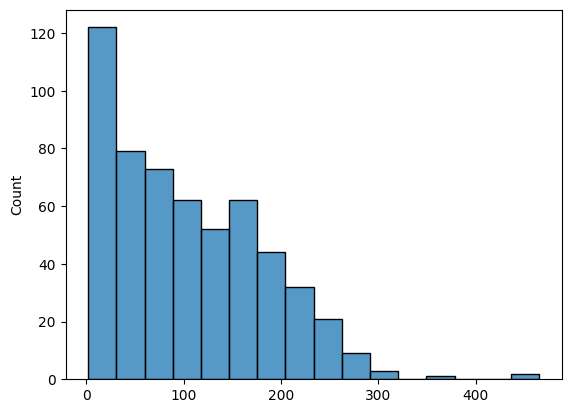

In [31]:
sns.histplot(survey_answer_len)

In [32]:
selected_user = 1400
len(data_edema[data_edema[identifier] == selected_user][['answer_text', 'date']])


0

In [33]:

def fill_in_all_daily_data(selected_user):
    selected_data_all = data_all[data_all[identifier] == selected_user][[identifier, 'answer_text', 'date']]
    selected_data_edema = data_edema[data_edema[identifier] == selected_user][[identifier, 'answer_text', 'date']]
    selected_data_no_symptom = selected_data_all[~selected_data_all['date'].isin(selected_data_edema['date'])]
    selected_data_no_symptom['answer_text'] = 1
    selected_data_edema.answer_text = selected_data_edema.answer_text.astype(int)
    selected_data_combined = pd.concat([selected_data_no_symptom, selected_data_edema])

    selected_data_combined.date = selected_data_combined.date.astype("datetime64[ns]")

    date_range = pd.date_range(np.min(selected_data_combined['date']), np.max((selected_data_combined['date'])), freq='d')
    date_df = pd.DataFrame()
    date_df['date'] = date_range
    date_df[identifier] = selected_user
    date_df['date'] = date_df['date'].astype("datetime64[ns]")

    selected_data_combined = pd.merge(date_df, selected_data_combined, how='left')
    selected_data_combined = selected_data_combined.replace("", np.nan)
    selected_data_combined = selected_data_combined.rename(columns={'answer_text': survey_question_str})
    return selected_data_combined


In [34]:
user_data_lst = []
for user in data_edema[identifier].unique():
    user_data_lst.append(fill_in_all_daily_data(user))

In [35]:
for u in user_data_lst:
    print(len(u))

212
211
234
208
226
213
231
215
214
141
65
168
195
207
205
89
207
188
253
221
240
485
163
180
200
239
252
252
264
273
237
250
216
228
16
216
215
229
226
21
232
217
246
211
224
193
34
81
180
202
210
208
212
204
212
230
218
195
214
144
85
222
187
81
180
157
212
208
186
200
214
215
222
96
214
191
116
205
214
85
205
217
91
54
287
252
279
317
173
277
217
424
195
548
82
100
91
253
469
215
43
233
170
117
218
168
273
257
192
270
294
288
248
173
118
335
281
324
207
261
180
116
115
280
152
282
190
269
268
113
89
267
500
422
397
132
310
305
333
164
451
76
358
452
239
220
115
249
168
31
442
273
76
74
231
99
302
264
382
188
72
79
171
48
216
271
271
223
348
173
173
281
184
429
234
269
257
248
247
199
95
63
179
132
123
246
227
233
252
244
174
162
22
151
63
92
189
20
265
300
269
180
201
239
262
181
200
22
203
225
222
196
215
173
105
68
191
250
213
234
229
213
231
203
212
216
205
217
240
213
234
19
244
221
262
261
6
222
197
42
198
219
200
155
221
182
221
212
91
219
238
182
302
297
248
166
92
201
254
23

In [36]:
user_data_lst[1]

,date,record_id,fatigue
0,2022-10-04,direct_482,2.0
1,2022-10-05,direct_482,1.0
2,2022-10-06,direct_482,1.0
3,2022-10-07,direct_482,1.0
4,2022-10-08,direct_482,1.0
...,...,...,...
206,2023-04-28,direct_482,NaN
207,2023-04-29,direct_482,NaN
208,2023-04-30,direct_482,NaN
209,2023-05-01,direct_482,NaN


<Axes: xlabel='date', ylabel='fatigue'>

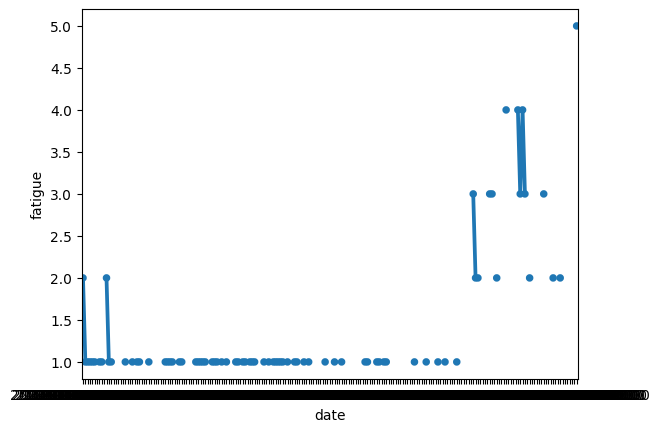

In [37]:

sns.pointplot(data=user_data_lst[1], x="date", y=survey_question_str, markers='.')


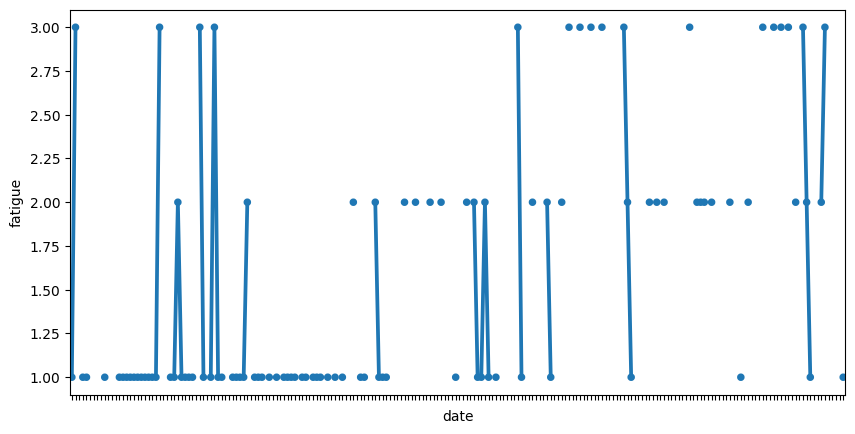

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))

plot = sns.pointplot(data=user_data_lst[0], x="date", y=survey_question_str, markers='.')

ax.set_xticklabels([])

plt.show()

In [39]:
# df = user_data_lst[0].copy()
# df['edema_coarse_label'] = df.answer_text
# df.loc[df["edema_coarse_label"] >= 2, "edema_coarse_label"] = 2
# df.loc[df["edema_coarse_label"] == 1, "edema_coarse_label"] = 0
# df

In [40]:
# edema_days = df[df['edema_coarse_label'] == 2]['date']
# pre_symptom_range = 3
# for i in range(pre_symptom_range):
#     df.loc[(df['date'].isin(edema_days-timedelta(days=i))) & (df['edema_coarse_label'] == 0), "edema_coarse_label"] = 1

In [41]:
# df

In [42]:
# plot = sns.pointplot(data=df, x="date", y=survey_question_str, markers='.')

In [43]:
# plot = sns.pointplot(data=df, x="date", y="edema_coarse_label", markers='.')

In [44]:
# import os
# def create_coarse_label(df, pre_symptom_range=3):
#     df['edema_coarse_label'] = df.answer_text
#     df.loc[df["edema_coarse_label"] >= 2, "edema_coarse_label"] = 2
#     df.loc[df["edema_coarse_label"] == 1, "edema_coarse_label"] = 0
#     edema_days = df[df['edema_coarse_label'] == 2]['date']

#     for i in range(1, pre_symptom_range + 1):
#         df.loc[(df['date'].isin(edema_days-timedelta(days=i))) & (df['edema_coarse_label'] == 0), "edema_coarse_label"] = 1
#     return df

# coarse_label_lst = []

# for df in user_data_lsth
#     coarse_label_lst.append(create_coarse_label(df))
target_path = os.path.join('/storage/home/ruizhu', target_directory, survey_question_str)
if not os.path.exists(target_path):
    os.mkdir(target_path)
for df in user_data_lst:
    user_id = df[identifier].unique()[0]
    df.to_csv(f"~/{target_directory}/{survey_question_str}/user_{user_id}_{survey_question_str}_label.csv", index=False)